# Climate Change Exploration: Maunalua Bay, Oahu, Hawai'i
## Fall 2021
### Elmera Azadpour
### 2021-12-08
All scripts and data can be accessed from [Aloha Aina Repo](https://github.com/aloha-aina/Aloha-Aina-Master)

Code derived from [CMIP6 PanGeo Gallery](http://gallery.pangeo.io/repos/pangeo-gallery/cmip6/precip_frequency_change.html)

In [2]:
## import libraries:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import fsspec
import gcsfs
import s3fs
import kedro
import nc_time_axis
import plotly.express as px
import metpy
from metpy.units import units

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6

In [3]:
## CMIP6 Public Data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head(50)

activity_id       institution_id        source_id       experiment_id  \
0   HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
1   HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
2   HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
3   HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
4   HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
5   HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
6   HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
7   HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
8   HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
9   HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
10  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
11  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
12  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
13  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
14  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
15  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
16  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
17  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
18  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
19  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
20  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
21  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
22  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
23  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
24  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
25  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
26  HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
27  HighResMIP  EC-Earth-Consortium    EC-Earth3P-HR  highresSST-present   
28  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
29  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
30  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
31  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
32  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
33  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
34  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
35  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
36  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
37  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
38  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
39  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
40  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
41  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
42  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
43  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
44  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
45  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
46  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
47  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
48  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
49  HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   

   member_id table_id variable_id grid_label  \
0   r1i1p1f1     Amon        hfls         gn   
1   r1i1p1f1  6hrPlev         

In [3]:
## Query for projection CMIP6 data
df_3hr_pr = df[(df.table_id == '3hr') & (df.variable_id == 'pr')]
len(df_3hr_pr)

run_counts = df_3hr_pr.groupby(['source_id', 'experiment_id'])['zstore'].count()
run_counts

source_id         experiment_id     
BCC-CSM2-MR       historical             1
                  ssp126                 1
                  ssp245                 1
                  ssp370                 1
                  ssp585                 1
CNRM-CM6-1        highresSST-present     1
                  historical             3
                  ssp126                 1
                  ssp245                 1
                  ssp370                 1
                  ssp585                 1
CNRM-CM6-1-HR     highresSST-present     1
CNRM-ESM2-1       historical             1
                  ssp126                 1
                  ssp245                 1
                  ssp370                 1
                  ssp585                 1
GFDL-CM4          1pctCO2                2
                  abrupt-4xCO2           2
                  amip                   2
                  historical             2
                  piControl              2
GFDL-CM4C192     

<div>
<center>
<img src="https://github.com/aloha-aina/Aloha-Aina-Master/blob/main/img/cmip6_ssp.png?raw=1" width="600"/>
<br>
Fig. 1: Future and historical CO2 emissions scenarios featured in CMIP6
<br>
Source: https://www.carbonbrief.org/cmip6-the-next-generation-of-climate-models-explained
</center>
</div>
<br>

### Exploring CNRM-ESM2-1, ssp245

In [7]:
## querty for 3hr, precipitaion for ssp 2-4.5 from CNRM-ESM2-1
df_3hr_ssp245_CNRM_pr = df[(df.table_id == '3hr') & (df.variable_id == 'pr') & (df.experiment_id== 'ssp245') & (df.source_id== 'CNRM-ESM2-1') ]
len(df_3hr_ssp245_CNRM_pr)
df_3hr_ssp245_CNRM_pr 

activity_id institution_id    source_id experiment_id member_id  \
68508  ScenarioMIP   CNRM-CERFACS  CNRM-ESM2-1        ssp245  r1i1p1f2   

      table_id variable_id grid_label  \
68508      3hr          pr         gr   

                                                  zstore  dcpp_init_year  \
68508  gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...             NaN   

        version  
68508  20190328

In [8]:
## pull data 
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_3hr_ssp245_CNRM_pr.zstore.values[-1]
print(zstore)

# create a mutable-mapping-style interface to the store
mapper = fsspec.get_mapper(zstore)

# open it using xarray and zarr
ds_proj = xr.open_zarr(mapper, consolidated=True)
ds_proj

gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp245/r1i1p1f2/3hr/pr/gr/v20190328/


<xarray.Dataset>
Dimensions:      (lat: 128, lon: 256, time: 251288, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time         (time) datetime64[ns] 2015-01-01T01:30:00 ... 2100-12-31T22:...
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(62822, 1), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables:
    pr           (time, lat, lon) float32 dask.array<chunksize=(600, 128, 256), meta=np.ndarray>
Attributes: (12/55)
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  CNRM-ESM2-1_ssp245_r1i1p1f2
    activity_id:            ScenarioMIP
    arpege_minor_version:   6.3.2
    branch_method:          standard
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f2
    xios_commit:            1442-shuffle
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/215d187a-7fa5-41cd-a59b-7fe164306a61...
    version_id:             v20190328

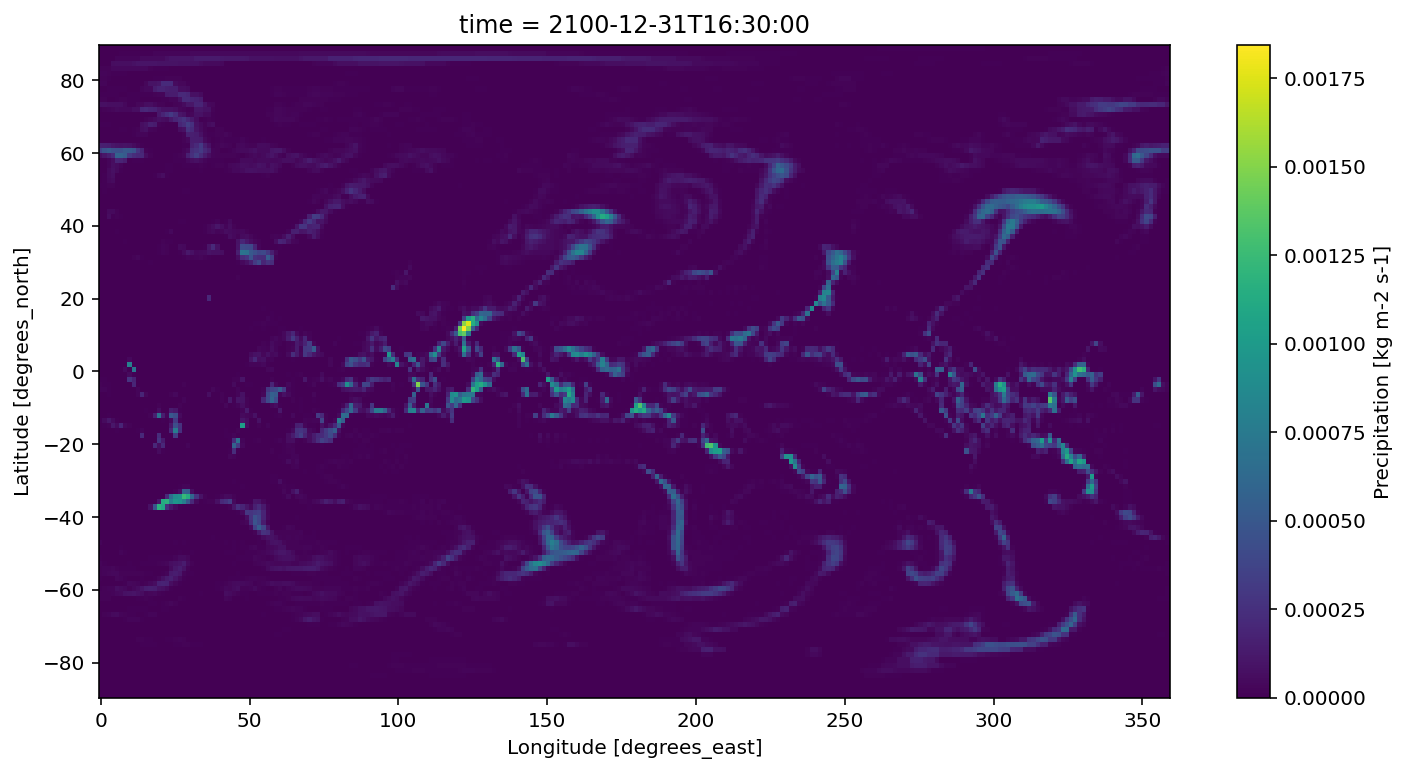

In [6]:
## Plot a map from a specific date: global coverage
ds_proj.pr.sel(time='2100-12-31T16:30:00.000000000').squeeze().plot()

In [10]:
# # Create logical masks for lat and lon variables for oahu 
# bouding box: -158.5698,20.9057,-157.406,22.0022
mask_lon = (ds_proj.pr.lon >= 201.43) & (ds_proj.pr.lon <= 202.59) 
mask_lat = (ds_proj.pr.lat >= 20.91) & (ds_proj.pr.lat <= 22.00)

## mask for Manalua Bay Region
## bouding box: -157.776173,21.253719,-157.701842,21.296411
## error when plotting: not enough values to unpack (expected 3, got 0)
## too small of area 
# mask_lon = (ds_proj.pr.lon >= 202.224) & (ds_proj.pr.lon <= 202.298) 
# mask_lat = (ds_proj.pr.lat >= 21.254) & (ds_proj.pr.lat <= 21.296)


In [11]:
# Apply lat/lon masks to the field, then calculate averages over the lat and lon dimensions
oahu_pr_proj=ds_proj.pr.where(mask_lon & mask_lat, drop = True)

## remove times associated with leap years (remove feb 29 from records)
oahu_pr_proj = oahu_pr_proj.sel(time=~((oahu_pr_proj.time.dt.month == 2) & (oahu_pr_proj.time.dt.day == 29)))
oahu_pr_proj

## group by day of year and avg by day
oahu_pr_proj['dayofyear'] = xr.DataArray(oahu_pr_proj.indexes['time'].strftime('%Y-%m-%d'), coords=oahu_pr_proj.time.coords)
oahu_pr_proj_avg = oahu_pr_proj.groupby('dayofyear').mean('time', keep_attrs=True) #retain attributes for metpy conversion in nxt step
oahu_pr_proj_avg

<xarray.DataArray 'pr' (dayofyear: 31390, lat: 1, lon: 1)>
dask.array<stack, shape=(31390, 1, 1), dtype=float32, chunksize=(1, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 21.71
  * lon        (lon) float64 202.5
  * dayofyear  (dayofyear) object '2015-01-01' '2015-01-02' ... '2100-12-31'
Attributes:
    cell_measures:       area: areacella
    cell_methods:        area: time: mean
    description:         at surface; includes both liquid and solid phases.  ...
    history:             none
    interval_operation:  900 s
    interval_write:      3 h
    long_name:           Precipitation
    online_operation:    average
    standard_name:       precipitation_flux
    units:               kg m-2 s-1

In [12]:
# Make metpy recognize the units
oahu_pr_proj_avg = oahu_pr_proj_avg.metpy.quantify()

# convert kg/m2/sec to in/day
density_water = units('kg / m^3') * 1000
oahu_pr_proj_converted_int = (oahu_pr_proj_avg / density_water)
oahu_pr_proj_converted_int = oahu_pr_proj_converted_int.metpy.convert_units('inches / day')
oahu_pr_proj_converted_int = oahu_pr_proj_converted_int.mean("lon").mean("lat")
oahu_pr_proj_converted_int

<xarray.DataArray 'pr' (dayofyear: 31390)>
<Quantity(dask.array<mean_agg-aggregate, shape=(31390,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>, 'inch / day')>
Coordinates:
  * dayofyear  (dayofyear) object '2015-01-01' '2015-01-02' ... '2100-12-31'

<div>
<center>
<img src="https://github.com/aloha-aina/Aloha-Aina-Master/blob/main/img/bb_oahu.png?raw=1" width="600"/>
<br>
Fig. 2: Bouding box coordinates used for projection analysis
<br>
Source: https://boundingbox.klokantech.com/
</center>
</div>
<br>

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.498437  , -0.398437  , -0.298437  , -0.19843699, -0.09843699,
         0.00156301,  0.10156301,  0.201563  ,  0.301563  ,  0.40156302,
         0.501563  ], dtype=float32),
 <BarContainer object of 10 artists>)

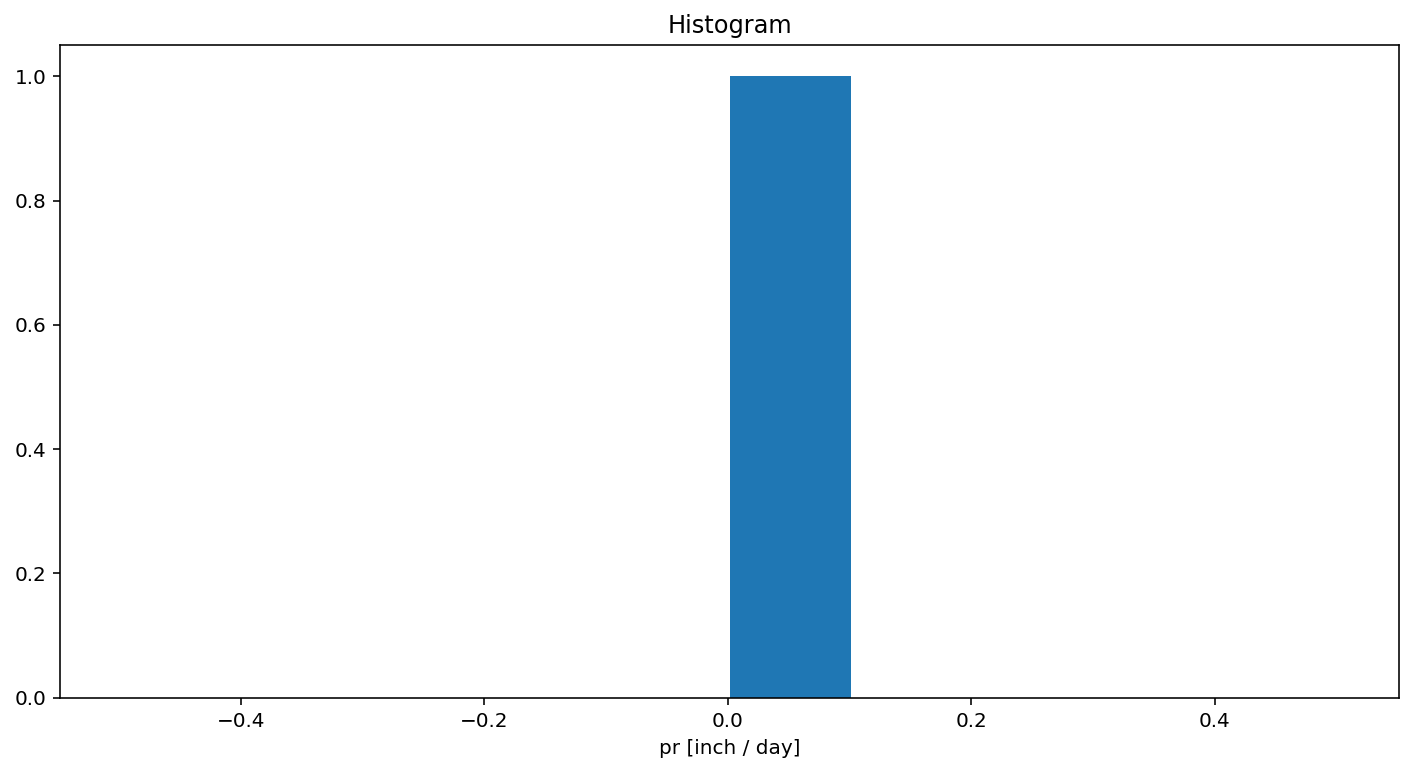

In [48]:
## Plot a plot from a projected date and lat and long for Oahu.
oahu_pr_proj_converted_int.sel(dayofyear='2050-12-01').squeeze().plot()

In [49]:
# Cast our xarray to dataframe
oahu_pr_proj_df = oahu_pr_proj_converted_int.to_dataframe().reset_index()
oahu_pr_proj_df.head(20)

dayofyear        pr
0   2015-01-01  0.000390
1   2015-01-02  0.001306
2   2015-01-03  0.022132
3   2015-01-04  0.196844
4   2015-01-05  0.441790
5   2015-01-06  0.076026
6   2015-01-07  0.059438
7   2015-01-08  0.060714
8   2015-01-09  0.026974
9   2015-01-10  0.005410
10  2015-01-11  0.001053
11  2015-01-12  0.009215
12  2015-01-13  0.644469
13  2015-01-14  0.055369
14  2015-01-15  0.019334
15  2015-01-16  0.442971
16  2015-01-17  0.001024
17  2015-01-18  0.054217
18  2015-01-19  0.481935
19  2015-01-20  0.000166

In [66]:
## to export df
oahu_pr_proj_df.to_csv('oahu_ssp245_2015_2100.csv', index = False)

In [22]:
fig = px.line(oahu_pr_proj_df, x='dayofyear', y="pr",
              title="Oahu, HI Daily Avg Precipitation, CNRM-ESM2-1, ssp245: 2015-2100",
                labels={
                     "dayofyear": "Time",
                     "pr": "Precipitation (inches/day)"
                 })

fig.show()

NameError: name 'oahu_pr_proj_df' is not defined

### Exploring CNRM-ESM2-1, ssp370

In [4]:
## querty for 3hr, precipitaion for ssp 3-7.0 from CNRM-ESM2-1
df_3hr_ssp370_CNRM_pr = df[(df.table_id == '3hr') & (df.variable_id == 'pr') & (df.experiment_id== 'ssp370') & (df.source_id== 'CNRM-ESM2-1') ]
len(df_3hr_ssp370_CNRM_pr)
df_3hr_ssp370_CNRM_pr 

activity_id institution_id    source_id experiment_id member_id  \
68820  ScenarioMIP   CNRM-CERFACS  CNRM-ESM2-1        ssp370  r1i1p1f2   

      table_id variable_id grid_label  \
68820      3hr          pr         gr   

                                                  zstore  dcpp_init_year  \
68820  gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...             NaN   

        version  
68820  20190328

In [5]:
## pull data 
# get the path to a specific zarr store (the first one from the dataframe above)
zstore2 = df_3hr_ssp370_CNRM_pr.zstore.values[-1]
print(zstore2)

# create a mutable-mapping-style interface to the store
mapper2 = fsspec.get_mapper(zstore2)

# open it using xarray and zarr
ds_proj_ssp370 = xr.open_zarr(mapper2, consolidated=True)
ds_proj_ssp370

gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp370/r1i1p1f2/3hr/pr/gr/v20190328/


<xarray.Dataset>
Dimensions:      (lat: 128, lon: 256, time: 251288, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time         (time) datetime64[ns] 2015-01-01T01:30:00 ... 2100-12-31T22:...
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(62822, 1), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables:
    pr           (time, lat, lon) float32 dask.array<chunksize=(449, 128, 256), meta=np.ndarray>
Attributes: (12/55)
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  CNRM-ESM2-1_ssp370_r1i1p1f2
    activity_id:            ScenarioMIP AerChemMIP
    arpege_minor_version:   6.3.2
    branch_method:          standard
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f2
    xios_commit:            1442-shuffle
    status:                 2019-11-03;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/2a291f7e-b9c9-4c68-b33b-cbfc153a587f...
    version_id:             v20190328

In [13]:
# Apply lat/lon masks to the field, then calculate averages over the lat and lon dimensions
oahu_pr_proj_ssp370=ds_proj_ssp370.pr.where(mask_lon & mask_lat, drop = True)

## remove times associated with leap years (remove feb 29 from records)
oahu_pr_proj_ssp370 = oahu_pr_proj_ssp370.sel(time=~((oahu_pr_proj_ssp370.time.dt.month == 2) & (oahu_pr_proj_ssp370.time.dt.day == 29)))
oahu_pr_proj_ssp370

## group by day of year and avg by day
oahu_pr_proj_ssp370['dayofyear'] = xr.DataArray(oahu_pr_proj_ssp370.indexes['time'].strftime('%Y-%m-%d'), coords=oahu_pr_proj_ssp370.time.coords)
oahu_pr_proj_ssp370_avg = oahu_pr_proj_ssp370.groupby('dayofyear').mean('time', keep_attrs=True) #retain attributes for metpy conversion in nxt step
oahu_pr_proj_ssp370_avg


<xarray.DataArray 'pr' (dayofyear: 31390, lat: 1, lon: 1)>
dask.array<stack, shape=(31390, 1, 1), dtype=float32, chunksize=(1, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 21.71
  * lon        (lon) float64 202.5
  * dayofyear  (dayofyear) object '2015-01-01' '2015-01-02' ... '2100-12-31'
Attributes:
    cell_measures:       area: areacella
    cell_methods:        area: time: mean
    description:         at surface; includes both liquid and solid phases.  ...
    history:             none
    interval_operation:  900 s
    interval_write:      3 h
    long_name:           Precipitation
    online_operation:    average
    standard_name:       precipitation_flux
    units:               kg m-2 s-1

In [14]:
# Make metpy recognize the units
oahu_pr_proj_ssp370_avg = oahu_pr_proj_ssp370_avg.metpy.quantify()

# convert kg/m2/sec to in/day
density_water = units('kg / m^3') * 1000
oahu_pr_proj_ssp370_converted_int = (oahu_pr_proj_ssp370_avg / density_water)
oahu_pr_proj_ssp370_converted_int = oahu_pr_proj_ssp370_converted_int.metpy.convert_units('inches / day')
oahu_pr_proj_ssp370_converted_int = oahu_pr_proj_ssp370_converted_int.mean("lon").mean("lat")
oahu_pr_proj_ssp370_converted_int

<xarray.DataArray 'pr' (dayofyear: 31390)>
<Quantity(dask.array<mean_agg-aggregate, shape=(31390,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>, 'inch / day')>
Coordinates:
  * dayofyear  (dayofyear) object '2015-01-01' '2015-01-02' ... '2100-12-31'

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.4963051 , -0.3963051 , -0.29630512, -0.19630511, -0.09630511,
         0.00369489,  0.10369489,  0.2036949 ,  0.3036949 ,  0.4036949 ,
         0.5036949 ], dtype=float32),
 <BarContainer object of 10 artists>)

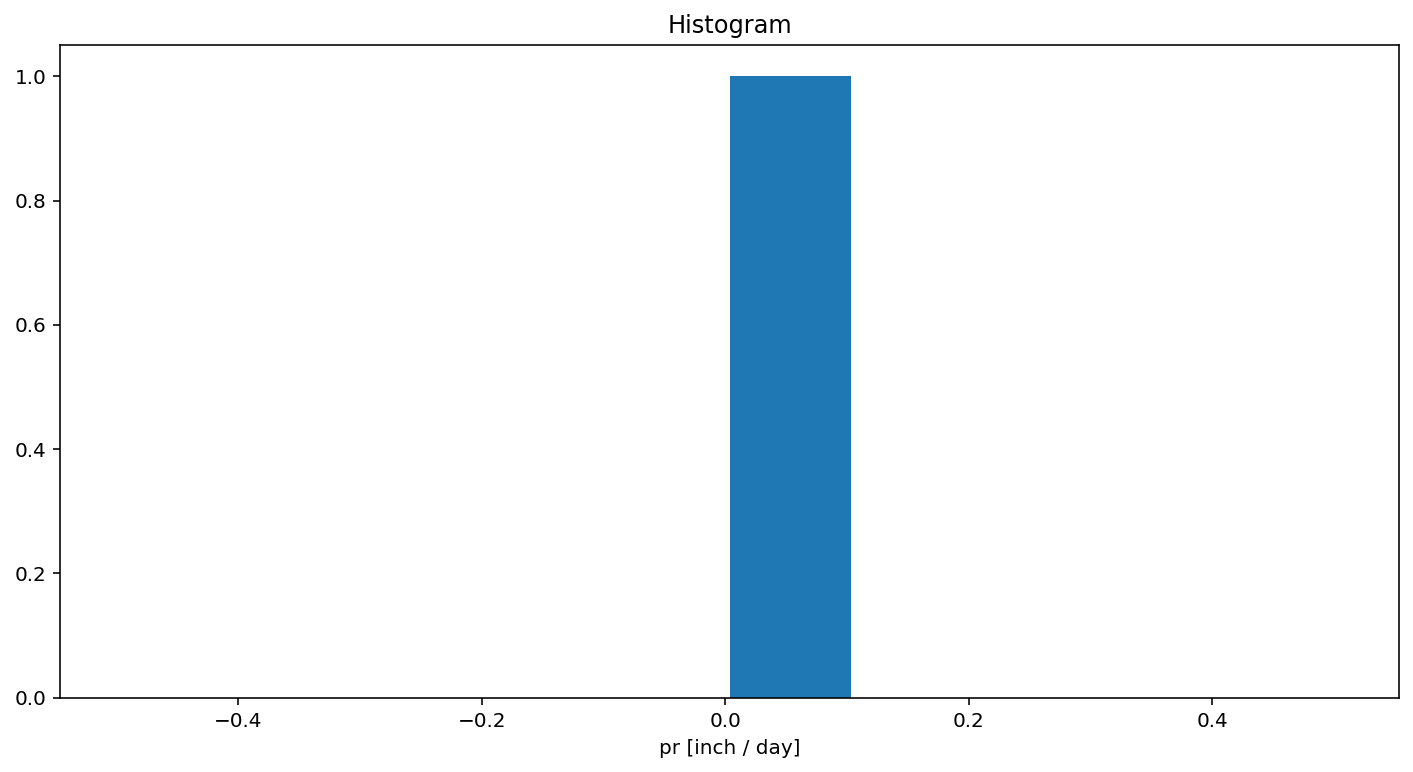

In [15]:
## Plot a plot from a projected ssp370 date and lat and long for Oahu.
oahu_pr_proj_ssp370_converted_int.sel(dayofyear='2050-12-01').squeeze().plot()

In [16]:
# Cast our xarray to dataframe
oahu_pr_proj_ssp370_df = oahu_pr_proj_ssp370_converted_int.to_dataframe().reset_index()
oahu_pr_proj_ssp370_df.head(20)


dayofyear            pr
0   2015-01-01  3.701659e-04
1   2015-01-02  2.282345e-03
2   2015-01-03  1.025546e-02
3   2015-01-04  3.492512e-01
4   2015-01-05  9.594570e-01
5   2015-01-06  2.072181e-01
6   2015-01-07  1.574929e-01
7   2015-01-08  5.034250e-02
8   2015-01-09  4.010621e-02
9   2015-01-10  2.340790e-02
10  2015-01-11  3.337233e-03
11  2015-01-12  5.087506e-03
12  2015-01-13  4.717490e-02
13  2015-01-14  1.209491e+00
14  2015-01-15  9.867913e-03
15  2015-01-16  1.273414e-01
16  2015-01-17  1.849313e+00
17  2015-01-18  4.772992e-03
18  2015-01-19  5.384365e-22
19  2015-01-20  1.341719e-05

In [23]:
## to export df
# oahu_pr_proj_ssp370_df.to_csv('oahu_ssp370_2015_2100.csv', index = False)

In [21]:
fig = px.line(oahu_pr_proj_ssp370_df, x='dayofyear', y="pr",
              title="Oahu, HI Daily Avg Precipitation, CNRM-ESM2-1, ssp370: 2015-2100",
                labels={
                     "dayofyear": "Time",
                     "pr": "Precipitation (inches/day)"
                 })

fig.show()

### Exploring CNRM-ESM2-1, ssp585

In [24]:
## querty for 3hr, precipitaion for ssp 5-8.5 from CNRM-ESM2-1
df_3hr_ssp585_CNRM_pr = df[(df.table_id == '3hr') & (df.variable_id == 'pr') & (df.experiment_id== 'ssp585') & (df.source_id== 'CNRM-ESM2-1') ]
len(df_3hr_ssp585_CNRM_pr)
df_3hr_ssp585_CNRM_pr

activity_id institution_id    source_id experiment_id member_id  \
69198  ScenarioMIP   CNRM-CERFACS  CNRM-ESM2-1        ssp585  r1i1p1f2   

      table_id variable_id grid_label  \
69198      3hr          pr         gr   

                                                  zstore  dcpp_init_year  \
69198  gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...             NaN   

        version  
69198  20190328

In [25]:
## pull data 
# get the path to a specific zarr store (the first one from the dataframe above)
zstore3 = df_3hr_ssp585_CNRM_pr.zstore.values[-1]
print(zstore3)

# create a mutable-mapping-style interface to the store
mapper3 = fsspec.get_mapper(zstore3)

# open it using xarray and zarr
ds_proj_ssp585 = xr.open_zarr(mapper3, consolidated=True)
ds_proj_ssp585

gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp585/r1i1p1f2/3hr/pr/gr/v20190328/


<xarray.Dataset>
Dimensions:      (lat: 128, lon: 256, time: 251288, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time         (time) datetime64[ns] 2015-01-01T01:30:00 ... 2100-12-31T22:...
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(62822, 1), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables:
    pr           (time, lat, lon) float32 dask.array<chunksize=(600, 128, 256), meta=np.ndarray>
Attributes: (12/55)
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  CNRM-ESM2-1_ssp585_r1i1p1f2
    activity_id:            ScenarioMIP
    arpege_minor_version:   6.3.2
    branch_method:          standard
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f2
    xios_commit:            1442-shuffle
    status:                 2019-08-26;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/6fb366f9-6ed1-47fe-918c-08fa5ca8baa3...
    version_id:             v20190328

In [26]:
# Apply lat/lon masks to the field, then calculate averages over the lat and lon dimensions
oahu_pr_proj_ssp585=ds_proj_ssp585.pr.where(mask_lon & mask_lat, drop = True)

## remove times associated with leap years (remove feb 29 from records)
oahu_pr_proj_ssp585 = oahu_pr_proj_ssp585.sel(time=~((oahu_pr_proj_ssp585.time.dt.month == 2) & (oahu_pr_proj_ssp585.time.dt.day == 29)))
oahu_pr_proj_ssp585

## group by day of year and avg by day
oahu_pr_proj_ssp585['dayofyear'] = xr.DataArray(oahu_pr_proj_ssp585.indexes['time'].strftime('%Y-%m-%d'), coords=oahu_pr_proj_ssp585.time.coords)
oahu_pr_proj_ssp585_avg = oahu_pr_proj_ssp585.groupby('dayofyear').mean('time', keep_attrs=True) #retain attributes for metpy conversion in nxt step
oahu_pr_proj_ssp585_avg

<xarray.DataArray 'pr' (dayofyear: 31390, lat: 1, lon: 1)>
dask.array<stack, shape=(31390, 1, 1), dtype=float32, chunksize=(1, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 21.71
  * lon        (lon) float64 202.5
  * dayofyear  (dayofyear) object '2015-01-01' '2015-01-02' ... '2100-12-31'
Attributes:
    cell_measures:       area: areacella
    cell_methods:        area: time: mean
    description:         at surface; includes both liquid and solid phases.  ...
    history:             none
    interval_operation:  900 s
    interval_write:      3 h
    long_name:           Precipitation
    online_operation:    average
    standard_name:       precipitation_flux
    units:               kg m-2 s-1

In [27]:
# Make metpy recognize the units
oahu_pr_proj_ssp585_avg = oahu_pr_proj_ssp585_avg.metpy.quantify()

# convert kg/m2/sec to in/day
density_water = units('kg / m^3') * 1000
oahu_pr_proj_ssp585_converted_int = (oahu_pr_proj_ssp585_avg / density_water)
oahu_pr_proj_ssp585_converted_int = oahu_pr_proj_ssp585_converted_int.metpy.convert_units('inches / day')
oahu_pr_proj_ssp585_converted_int = oahu_pr_proj_ssp585_converted_int.mean("lon").mean("lat")
oahu_pr_proj_ssp585_converted_int

<xarray.DataArray 'pr' (dayofyear: 31390)>
<Quantity(dask.array<mean_agg-aggregate, shape=(31390,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>, 'inch / day')>
Coordinates:
  * dayofyear  (dayofyear) object '2015-01-01' '2015-01-02' ... '2100-12-31'

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.48379615, -0.38379616, -0.28379616, -0.18379617, -0.08379617,
         0.01620384,  0.11620384,  0.21620384,  0.31620383,  0.41620383,
         0.5162038 ], dtype=float32),
 <BarContainer object of 10 artists>)

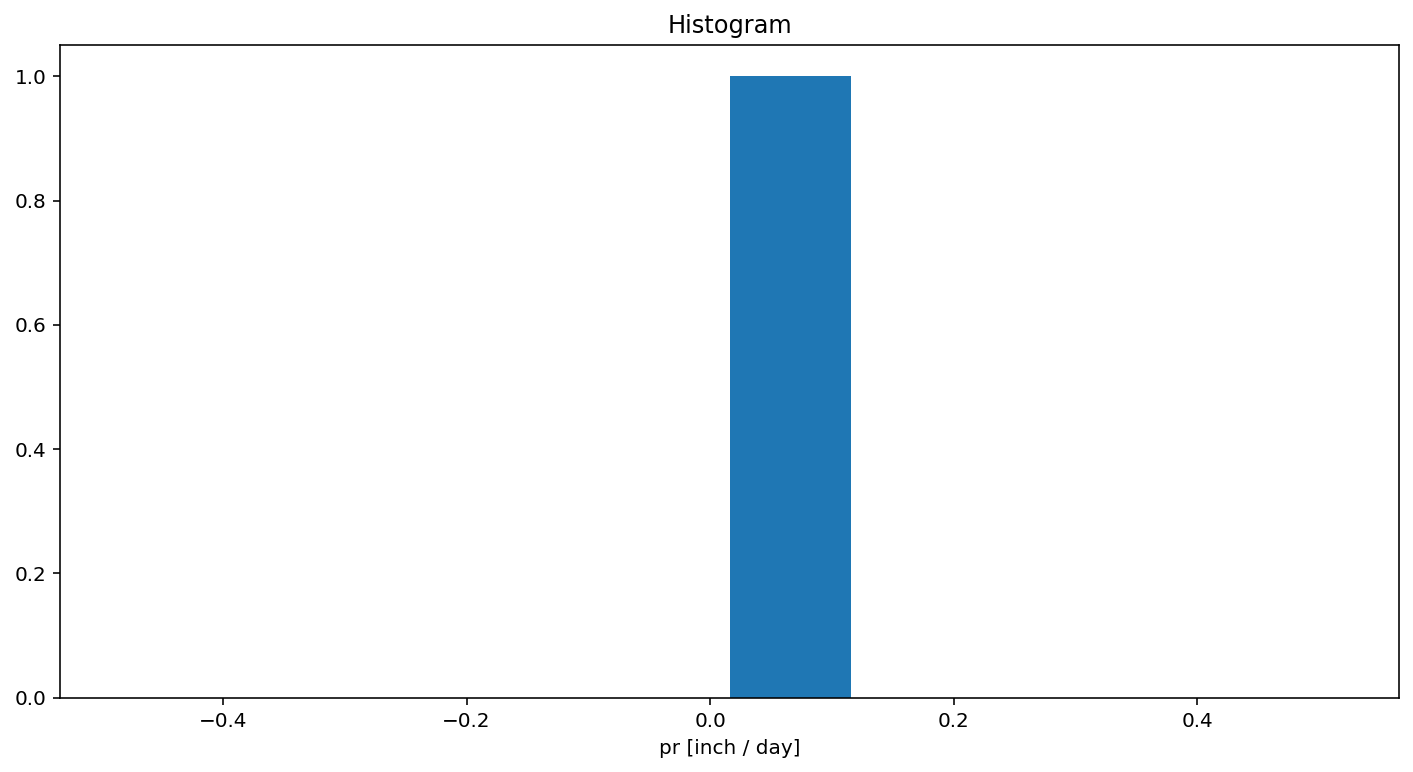

In [28]:
## Plot a plot from a projected ssp585 date and lat and long for Oahu.
oahu_pr_proj_ssp585_converted_int.sel(dayofyear='2050-12-01').squeeze().plot()

In [29]:
# Cast our xarray to dataframe
oahu_pr_proj_ssp585_df = oahu_pr_proj_ssp585_converted_int.to_dataframe().reset_index()
oahu_pr_proj_ssp585_df.head(20)

dayofyear        pr
0   2015-01-01  0.000311
1   2015-01-02  0.001061
2   2015-01-03  0.019240
3   2015-01-04  0.289843
4   2015-01-05  0.766865
5   2015-01-06  0.173856
6   2015-01-07  0.088689
7   2015-01-08  0.044970
8   2015-01-09  0.023198
9   2015-01-10  0.016240
10  2015-01-11  0.005077
11  2015-01-12  0.207648
12  2015-01-13  0.277482
13  2015-01-14  0.007074
14  2015-01-15  0.011796
15  2015-01-16  0.483247
16  2015-01-17  0.000010
17  2015-01-18  0.009342
18  2015-01-19  0.069012
19  2015-01-20  0.005040

In [30]:
## to export df
oahu_pr_proj_ssp585_df.to_csv('oahu_ssp585_2015_2100.csv', index = False)

In [31]:
fig = px.line(oahu_pr_proj_ssp585_df, x='dayofyear', y="pr",
              title="Oahu, HI Daily Avg Precipitation, CNRM-ESM2-1, ssp585: 2015-2100",
                labels={
                     "dayofyear": "Time",
                     "pr": "Precipitation (inches/day)"
                 })

fig.show()